## **Topic:** Deep Learning-Based Identification of Dermatological Issues in Facial Skin
**Team Members:** Alissultan Amankos (000801266) and Batyr Kenzheakhmetov (000801267)

**Honor Code:** "I have neither given nor received unauthorized aid in completing this work, nor have I presented someone else's work as my own."

# **Introduction (Project Abstract - Part I):**

Our team project revolves around employing deep learning to automatically identify and classify different types of acne lesions on people's faces. Acne, a common skin condition, presents various types of lesions, including comedones, papules, and pustules. Comedones are non-inflammatory, often appearing as blackheads or whiteheads, while papules and pustules are inflammatory and characterized by redness and swelling. By leveraging deep learning algorithms, we aim to develop a smart system capable of accurately recognizing these different types of acne lesions.

**Dataset Link to the source:** https://universe.roboflow.com/acnedet/acnedet-v1/model/2

**Dataset Link to Google Drive:** https://drive.google.com/drive/folders/1MFlQiIhyuIMGljUOQ1hlmg6x4A9arPqr?usp=sharing

**Dataset Example:**
image.png

# **Convolutional Neural Network and Pre-trained Model:**

Convolutional Neural Network (CNN) for image classification is a popular and effective approach. CNNs are particularly well-suited for this task because they can automatically learn relevant features from raw image data.

### **At this stage of our scientific project we plan to use several Pre-trained models to check the learning performance.**

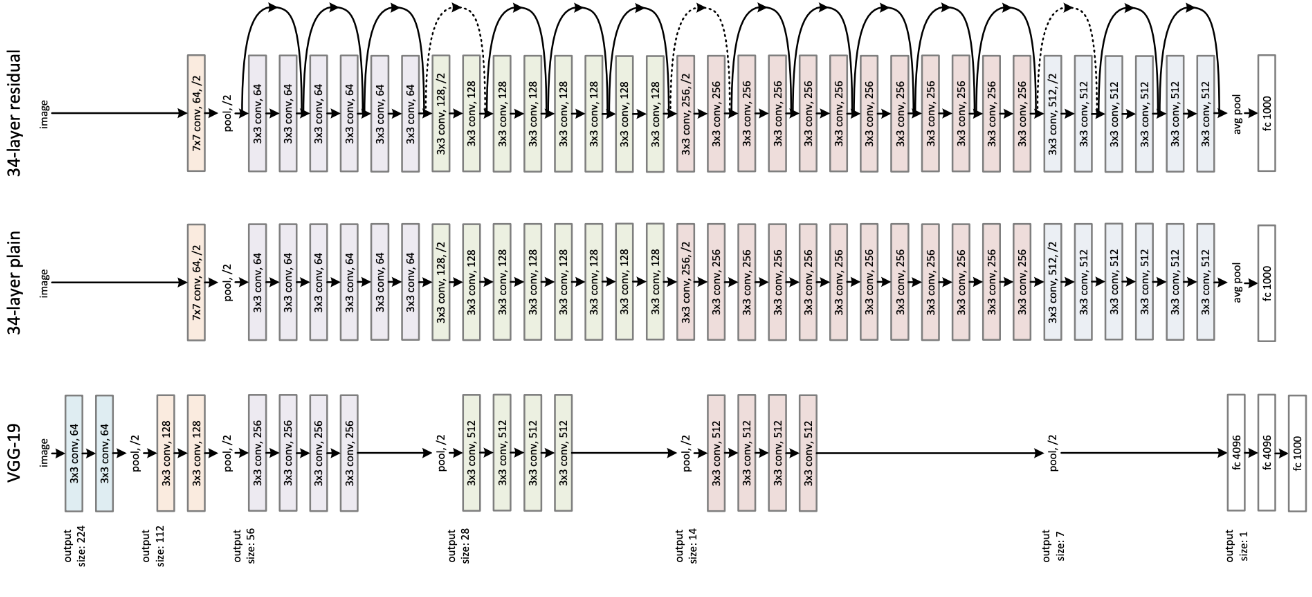


### **Import VGG19 model code:**

In [ ]:
# Import VGG19 model from Keras applications module
from keras.applications import VGG19

# Load the VGG19 model with pre-trained ImageNet weights
# - 'input_shape=(416, 416, 3)' specifies the shape of input images as 416x416 pixels with 3 color channels (RGB)
base_model = VGG19(weights='imagenet',
                            include_top=False,
                            input_shape=(416, 416, 3))

### **CNN Model code:**

In [ ]:
# Create a Sequential model
model = Sequential()

# Add the first convolutional layer with 16 filters, kernel size of 5x5, ReLU activation, and input shape of (416, 416, 3)
model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(416, 416, 3)))

model.add(BatchNormalization())                                                 # Add BatchNormalization layer to normalize the activations of the previous layer
model.add(MaxPooling2D(pool_size=(2, 2)))                                       # Add MaxPooling2D layer to downsample the feature maps
model.add(BatchNormalization())                                                 # Add another BatchNormalization layer for normalization
model.add(MaxPooling2D(pool_size=(2, 2)))                                       # Add another MaxPooling2D layer
model.add(Dropout(0.2))                                                         # Add Dropout layer with a rate of 0.2 to prevent overfitting

model.add(Flatten())                                                            # Add Flatten layer to convert the 2D feature maps into a 1D feature vector
model.add(Dense(128, activation='relu'))                                        # Add Dense layer with 128 units and ReLU activation
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))                                         # Add Dense layer with 64 units and ReLU activation
model.add(Dropout(0.5))

# Add Dense layer with 4 units (assuming it's a classification task with 4 classes) and sigmoid activation
model.add(Dense(4, activation='sigmoid'))

# Compile the model with Adam optimizer, binary crossentropy loss function, and accuracy metric
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# **Prediction (Project Abstract - Part II):**

Even though we decided to take this topic as our scientific project, it is important to note that the topic is not mainstream in the field of Deep Learning. In our search for primary information, we came across some works of a similar nature, but all of them have an accuracy of about 50-60%. We assume that such a trend is observed due to the low size of the data set (2000-3000 images). In our case, we are going to use more photos in training and validation. In addition, it is important to remember that we are doing scientific work, and we need to create several different models to understand which one works better with the same set of data. It is assumed that the accuracy we will ultimately achieve will be more than 80%, however, this is not our main goal. After achieving this result, we will work to further improve the model. If the accuracy is 90% or more, then this will be our unconditional victory.


# **Coding Part:**

# Experiment I

Our main dataset consists of photographs of pimples and a text file in which the locations of all pimples in the photos are written (by specifying pixels) and the classification of these pimples. In order to take advantage of this situation correctly, we are obliged to learn computer vision technology.

**Types of classification:**
*   Comedone
*   Nodules
*   Papules
*   Pustules

**Text file with lables:**

***levle1_596_png_jpg.rf.008eb6e34ffe44abfb8d5e1ef588ef52.jpg 127,68,143,84,0 117,139,134,154,0***

The Name of the picture: levle1_596_png_jpg.rf.008eb6e34ffe44abfb8d5e1ef588ef52.jpg

Location of pimple by pixels: 127,68,143,84

Classification of pimple: 0


However, we begin our research work in order to build a model without determining the locations of the prosthetics on the face. In other words, after you upload your photo, the model must tell you what types of acne are present on the person’s face.

**And now the label content looks like this:**

image.png

Where the number 1 means that this type of pimple exists, and zero means that there is no such type of pimple.

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.preprocessing import image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from keras.layers import BatchNormalization

In [ ]:
# We connect to Google Drive to get the necessary files from there
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Directories
# Base directory containing the dataset
b_dir = '/content/drive/MyDrive/DATA(pimples)'

# Directories for training, validation, and testing sets
train_dir = b_dir + '/train'
vali_dir = b_dir + '/valid'
test_dir = b_dir + '/test'

label_train_dir = b_dir + '/classes_seperated_train.csv'
label_vali_dir = b_dir + '/classes_seperated_valid.csv'
lable_test_dir = b_dir + '/classes_seperated_test.csv'

import os, shutil
print('total training images: ', len(os.listdir(train_dir)))
print('total validation images: ', len(os.listdir(vali_dir)))
print('total testing images: ', len(os.listdir(test_dir)))

total training images:  3965
total validation images:  320
total testing images:  51


**The first three pictures from the training dataset:**

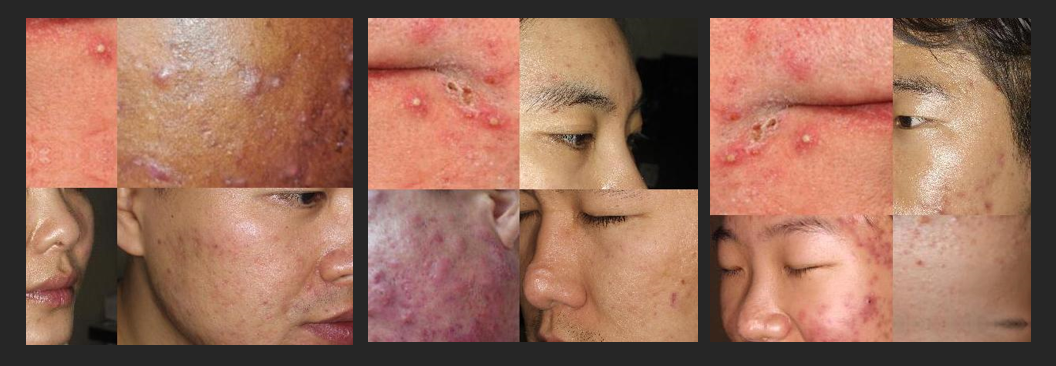

In [ ]:
#Now let us read metadata to get our Y values (multiple lables)
df_train = pd.read_csv(label_train_dir)
df_vali = pd.read_csv(label_vali_dir)
df_test = pd.read_csv(lable_test_dir)
print(df_train.columns)
print(df_train.head())     # printing first five rows of the file

Index(['Name', '0', '1', '2', '3'], dtype='object')
                                                Name  0  1  2  3
0  levle0_427_png_jpg.rf.00283cbf0ece18facfc50661...  1  0  1  0
1  levle0_514_jpg.rf.00240c05ed2ff4c06082ebace36b...  1  0  0  0
2  levle1_384_png_jpg.rf.00a624146dd38192a31ff3fd...  1  1  1  1
3  levle1_505_png_jpg.rf.00cb23b99ce6ed9efb9ba5ab...  1  0  1  1
4  levle1_295_jpg.rf.00de08138cf6586e349341a376bd...  1  0  1  0


In [ ]:
X_train = []
for i in tqdm(range(df_train.shape[0])):
    img = image.load_img(train_dir +"/"+ df_train['Name'][i], target_size=(416,416,3))
    img = image.img_to_array(img)
    img = img/255.
    X_train.append(img)

X_val = []
for i in tqdm(range(df_vali.shape[0])):
    img = image.load_img(vali_dir +"/"+ df_vali['Name'][i], target_size=(416,416,3))
    img = image.img_to_array(img)
    img = img/255.
    X_val.append(img)

X_test = []
for i in tqdm(range(df_test.shape[0])):
    img = image.load_img(test_dir +"/"+ df_test['Name'][i], target_size=(416,416,3))
    img = image.img_to_array(img)
    img = img/255.
    X_test.append(img)

X_train = np.array(X_train)
X_val = np.array(X_val)
X_test = np.array(X_test)

print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

100%|██████████| 51/51 [00:20<00:00,  2.49it/s]


(3965, 416, 416, 3)
(320, 416, 416, 3)
(51, 416, 416, 3)


In [ ]:
Y_train = np.array(df_train.drop(['Name'], axis=1))
Y_val = np.array(df_vali.drop(['Name'], axis=1))
Y_test = np.array(df_test.drop(['Name'], axis=1))

print(Y_train.shape)
print(Y_val.shape)
print(Y_test.shape)

(3965, 4)
(320, 4)
(51, 4)


# MODEL 1 (CNN model for multilabel problems)

In [ ]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(5, 5), activation="relu", input_shape=(416,416,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))   # MaxPooling2D layer to downsample the feature maps.
model.add(BatchNormalization())             # BatchNormalization layer for normalization.
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))                     # Dropout layer to prevent overfitting.

model.add(Conv2D(filters=32, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dropout(0.2))


model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 412, 412, 16)      1216      
                                                                 
 batch_normalization_5 (Bat  (None, 412, 412, 16)      64        
 chNormalization)                                                
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 206, 206, 16)      0         
 g2D)                                                            
                                                                 
 batch_normalization_6 (Bat  (None, 206, 206, 16)      64        
 chNormalization)                                                
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 103, 103, 16)      0         
 g2D)                                                 

In [ ]:
history = model.fit(X_train, Y_train, epochs=6, validation_data=(X_val, Y_val), batch_size=32)

Epoch 1/6
124/124 [==============================] - 24s 169ms/step - loss: 0.8741 - accuracy: 0.5082 - val_loss: 0.6754 - val_accuracy: 0.6219
Epoch 2/6
124/124 [==============================] - 20s 164ms/step - loss: 0.6617 - accuracy: 0.6063 - val_loss: 0.7122 - val_accuracy: 0.7031
Epoch 3/6
124/124 [==============================] - 20s 164ms/step - loss: 0.5976 - accuracy: 0.6870 - val_loss: 0.6587 - val_accuracy: 0.7000
Epoch 4/6
124/124 [==============================] - 21s 166ms/step - loss: 0.5795 - accuracy: 0.7286 - val_loss: 0.6591 - val_accuracy: 0.7031
Epoch 5/6
124/124 [==============================] - 21s 167ms/step - loss: 0.5673 - accuracy: 0.7637 - val_loss: 0.7200 - val_accuracy: 0.7031
Epoch 6/6
124/124 [==============================] - 21s 168ms/step - loss: 0.5642 - accuracy: 0.8164 - val_loss: 0.6621 - val_accuracy: 0.7031


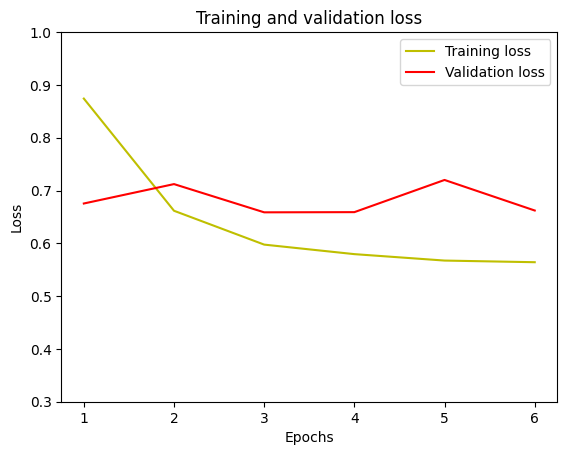

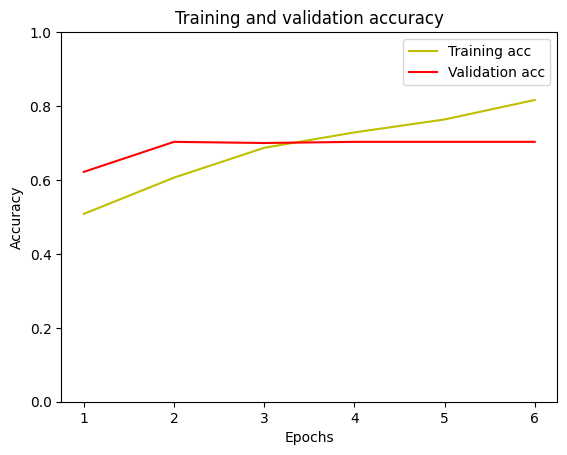

In [ ]:
# Plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.ylim(0.3, 1)  # Set the y-axis limit to be between 0 and 1
plt.show()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(0, 1)  # Set the y-axis limit to be between 0 and 1
plt.show()

**Random three pictures from the test dataset:**

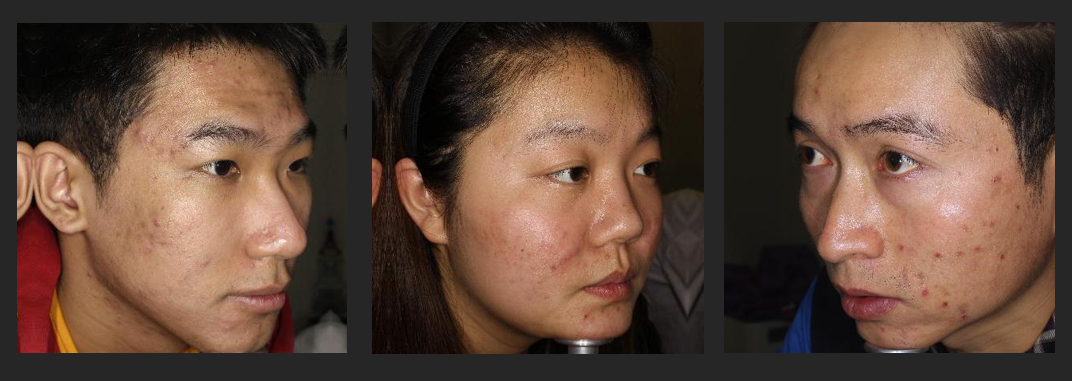

In [ ]:
model.evaluate(X_test, Y_test)

2/2 [==============================] - 0s 34ms/step - loss: 0.6242 - accuracy: 0.8235


[0.6242091655731201, 0.8235294222831726]

In [ ]:
from keras.applications import EfficientNetB3
from keras.optimizers import RMSprop
from keras import layers

efficient_model = EfficientNetB3(
    weights="imagenet",
    include_top=False,
    input_shape=(416, 416, 3)
)

efficient_model.trainable = False


model21 = Sequential()
model21.add(efficient_model)
model21.add(layers.Flatten())
model21.add(layers.Dropout(0.5))
model21.add(layers.Dense(4, activation='sigmoid'))


model21.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(lr=1e-4),
    metrics=['accuracy']
)

history2 = model21.fit(X_train, Y_train, epochs=10, validation_data=(X_val, Y_val), batch_size=32)

model21.evaluate(X_test, Y_test)

43941136/43941136 [==============================] - 0s 0us/step


Epoch 1/10
124/124 [==============================] - 70s 446ms/step - loss: 12.8912 - accuracy: 0.4870 - val_loss: 21.5616 - val_accuracy: 0.7031
Epoch 2/10
124/124 [==============================] - 49s 396ms/step - loss: 12.1685 - accuracy: 0.5253 - val_loss: 17.5620 - val_accuracy: 0.7031
Epoch 3/10
124/124 [==============================] - 50s 402ms/step - loss: 11.7374 - accuracy: 0.5470 - val_loss: 12.2594 - val_accuracy: 0.1906
Epoch 4/10
124/124 [==============================] - 50s 405ms/step - loss: 12.2651 - accuracy: 0.5533 - val_loss: 15.9307 - val_accuracy: 0.1906
Epoch 5/10
124/124 [==============================] - 50s 407ms/step - loss: 11.8106 - accuracy: 0.5266 - val_loss: 10.3623 - val_accuracy: 0.7031
Epoch 6/10
124/124 [==============================] - 51s 409ms/step - loss: 12.1913 - accuracy: 0.4991 - val_loss: 18.2896 - val_accuracy: 0.7031
Epoch 7/10
124/124 [==============================] - 51s 411ms/step - loss: 11.8907 - accuracy: 0.5697 - val_loss: 27

[18.12586212158203, 0.8235294222831726]

# MODEL 2 (Pre-trainded with ResNet50)

ResNet50 is a pre-trained convolutional neural network (CNN) architecture that has been trained on a large dataset, typically ImageNet, which contains millions of labeled images across thousands of categories. It was introduced by Microsoft Research in 2015 and is a variant of the ResNet (Residual Network) architecture.

Here's some information about ResNet50:

Architecture: ResNet50 is a deep CNN architecture consisting of 50 layers, hence the name "ResNet50". It comprises a series of convolutional layers, pooling layers, and shortcut connections, with a final global average pooling layer followed by a fully connected layer for classification.

Residual Blocks: ResNet50 employs residual blocks, which address the degradation problem that often occurs with very deep networks. The key innovation is the introduction of skip connections or shortcuts that allow the gradient to flow more easily during training, mitigating the vanishing gradient problem. These shortcuts enable the network to learn residual functions with respect to the layer inputs, making it easier to train much deeper networks.

In [ ]:
from keras.applications import ResNet50
from keras.optimizers import RMSprop
from keras import layers

ResNet_model = ResNet50(
    weights="imagenet",
    include_top=False,
    input_shape=(416, 416, 3)
)

ResNet_model.trainable = False


model2 = Sequential()
model2.add(ResNet_model)
model2.add(layers.Flatten())
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(4, activation='sigmoid'))


model2.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(lr=1e-4),
    metrics=['accuracy']
)

model2.summary()

94765736/94765736 [==============================] - 4s 0us/step


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 13, 13, 2048)      23587712  
                                                                 
 flatten (Flatten)           (None, 346112)            0         
                                                                 
 dropout (Dropout)           (None, 346112)            0         
                                                                 
 dense (Dense)               (None, 4)                 1384452   
                                                                 
Total params: 24972164 (95.26 MB)
Trainable params: 1384452 (5.28 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [ ]:
history2 = model2.fit(X_train, Y_train, epochs=10, validation_data=(X_val, Y_val), batch_size=32)

Epoch 1/10
124/124 [==============================] - 57s 369ms/step - loss: 24.1315 - accuracy: 0.5079 - val_loss: 29.3317 - val_accuracy: 0.7031
Epoch 2/10
124/124 [==============================] - 43s 347ms/step - loss: 21.8759 - accuracy: 0.4956 - val_loss: 35.7545 - val_accuracy: 0.1906
Epoch 3/10
124/124 [==============================] - 44s 358ms/step - loss: 21.5149 - accuracy: 0.5044 - val_loss: 21.5327 - val_accuracy: 0.1906
Epoch 4/10
124/124 [==============================] - 44s 352ms/step - loss: 21.5123 - accuracy: 0.4928 - val_loss: 34.7255 - val_accuracy: 0.7031
Epoch 5/10
124/124 [==============================] - 44s 355ms/step - loss: 21.6347 - accuracy: 0.5271 - val_loss: 26.0494 - val_accuracy: 0.0125
Epoch 6/10
124/124 [==============================] - 44s 353ms/step - loss: 21.1983 - accuracy: 0.5241 - val_loss: 9.1291 - val_accuracy: 0.7031
Epoch 7/10
124/124 [==============================] - 44s 356ms/step - loss: 20.9630 - accuracy: 0.4863 - val_loss: 24.

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

NameError: name 'history2' is not defined

In [ ]:
model2.evaluate(X_test, Y_test)

2/2 [==============================] - 5s 4s/step - loss: 36.7539 - accuracy: 0.8235


[36.75392532348633, 0.8235294222831726]

# MODEL 3 (Pre-trained with VGG19)

VGG19 is a pre-trained convolutional neural network (CNN) architecture that was introduced by the Visual Geometry Group (VGG) at the University of Oxford. It is a variant of the VGG network, which was proposed in the paper "Very Deep Convolutional Networks for Large-Scale Image Recognition" by Karen Simonyan and Andrew Zisserman in 2014.

Here's some information about VGG19:

Architecture: VGG19 is a deep CNN architecture consisting of 19 layers. It follows a simple and uniform architecture, comprising mostly 3x3 convolutional layers with max-pooling layers interspersed throughout the network. The "19" in VGG19 denotes the number of weight layers in the network.

Convolutional Layers: VGG19 consists of multiple blocks of convolutional layers, each followed by a max-pooling layer. The convolutional layers use small 3x3 filters with a stride of 1 and "same" padding, resulting in a receptive field that covers the entire input image.

In [ ]:
from keras.applications import VGG19
from keras.optimizers import RMSprop
from keras import layers

vgg19_model = VGG19(
    weights="imagenet",
    include_top=False,
    input_shape=(416, 416, 3)
)

model3 = Sequential()
model3.add(vgg19_model)
model3.add(layers.Flatten())
model3.add(layers.Dropout(0.5))
model3.add(layers.Dense(4, activation='sigmoid'))

model3.layers[0].trainable = False

model3.compile(
    loss='binary_crossentropy',
    optimizer=RMSprop(lr=1e-4),
    metrics=['accuracy']
)

model3.summary()

80134624/80134624 [==============================] - 2s 0us/step


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 13, 13, 512)       20024384  
                                                                 
 flatten (Flatten)           (None, 86528)             0         
                                                                 
 dropout (Dropout)           (None, 86528)             0         
                                                                 
 dense (Dense)               (None, 4)                 346116    
                                                                 
Total params: 20370500 (77.71 MB)
Trainable params: 346116 (1.32 MB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [ ]:
history3 = model3.fit(X_train, Y_train, epochs=10, validation_data=(X_val, Y_val))

Epoch 1/10
124/124 [==============================] - 37s 222ms/step - loss: 2.5186 - accuracy: 0.5054 - val_loss: 4.0098 - val_accuracy: 0.7031
Epoch 2/10
124/124 [==============================] - 21s 172ms/step - loss: 2.0833 - accuracy: 0.5236 - val_loss: 1.8536 - val_accuracy: 0.1906
Epoch 3/10
124/124 [==============================] - 21s 172ms/step - loss: 1.9957 - accuracy: 0.5259 - val_loss: 2.7563 - val_accuracy: 0.1906
Epoch 4/10
124/124 [==============================] - 21s 172ms/step - loss: 1.9014 - accuracy: 0.5301 - val_loss: 3.1486 - val_accuracy: 0.7031
Epoch 5/10
124/124 [==============================] - 21s 172ms/step - loss: 1.7965 - accuracy: 0.5266 - val_loss: 3.6072 - val_accuracy: 0.5344
Epoch 6/10
124/124 [==============================] - 21s 172ms/step - loss: 1.7127 - accuracy: 0.4830 - val_loss: 1.4361 - val_accuracy: 0.5938
Epoch 7/10
124/124 [==============================] - 21s 172ms/step - loss: 1.5925 - accuracy: 0.5309 - val_loss: 2.9404 - val_ac

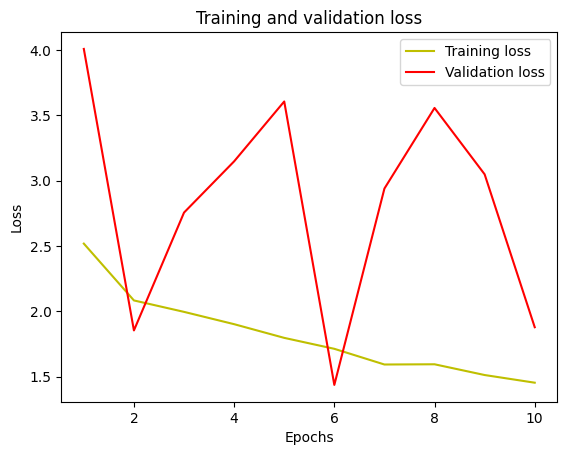

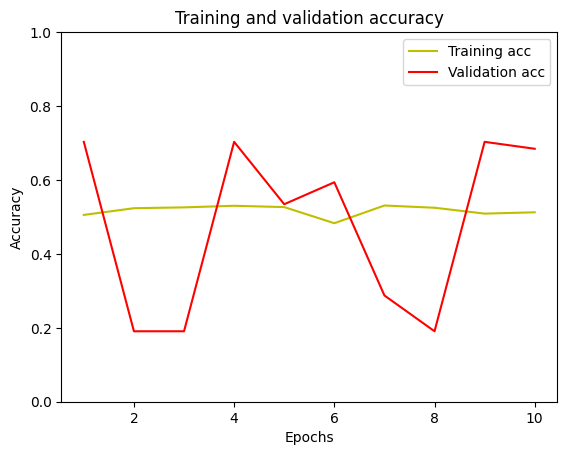

In [ ]:
#plot the training and validation accuracy and loss at each epoch
loss = history3.history['loss']
val_loss = history3.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.ylim(0, 1)
plt.show()

In [ ]:
model3.evaluate(X_test, Y_test)

2/2 [==============================] - 4s 4s/step - loss: 1.7468 - accuracy: 0.7843


[1.7467968463897705, 0.7843137383460999]

## Table with the results of loss and accuracy of the first experiment (Without marking pimple locations using pixels)

| **Indicators**    | MODEL CNN | MODEL (ResNet50)  | MODEL  (VGG19) | MODEL  (EfficientNetB3) |
|-------------------|----------|----------|----------|----------|
| **Loss**          | 0.63     | 36.75    | 2.15     | 14.62     |
| **Accuracy**      | 82.35%   | 82.35%   | 68.63%   | 82.35%   |

# Conclusions from the first experiment (Project Abstract - Part III):

As can be understood from the results of our first experiment, the results of the first model are the best. The Acurency of this model is about 82.35% and the loss is about 0.66. In order to achieve such indicators, we used the CNN model without Pre-trained model in the first. This model is a special model for multilabel problems. In other cases, pretrained models are used that do not perform well at loss. This trend is due to the fact that they are not suitable for multilabel problems, and also because they previously trained on images that do not look like images of acne.

These results are not good, but with a similar set of training data this is the maximum result that we could achieve. Now, in the second part of our work, we plan to use a dataset with labels indicating the location of each pimple on the skin.

# Experiment II

In [ ]:
!pip uninstall tensorflow
!pip uninstall keras
!pip install --upgrade keras-cv tensorflow
!pip install --upgrade keras
!pip install tensorflow==2.15.1
!pip install -U pycocotools

Found existing installation: tensorflow 2.15.0
Uninstalling tensorflow-2.15.0:
  Would remove:
    /usr/local/bin/estimator_ckpt_converter
    /usr/local/bin/import_pb_to_tensorboard
    /usr/local/bin/saved_model_cli
    /usr/local/bin/tensorboard
    /usr/local/bin/tf_upgrade_v2
    /usr/local/bin/tflite_convert
    /usr/local/bin/toco
    /usr/local/bin/toco_from_protos
    /usr/local/lib/python3.10/dist-packages/tensorflow-2.15.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/tensorflow/*
Proceed (Y/n)? Y
  Successfully uninstalled tensorflow-2.15.0
Found existing installation: keras 2.15.0
Uninstalling keras-2.15.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/keras-2.15.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/keras/*
Proceed (Y/n)? Y
  Successfully uninstalled keras-2.15.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 613.1/613.1 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 2.4 MB/s eta 0:00:00
   

In [ ]:
import os
from tqdm.auto import tqdm
import xml.etree.ElementTree as ET
os.environ["KERAS_BACKEND"] = "tensorflow"
from keras_cv import bounding_box
from keras_cv import visualization
import tensorflow as tf
import keras_cv
import tensorflow_datasets as tfds
import keras
import cv2

from google.colab import drive
drive.mount('/content/drive')


print(tf.__version__)

Using TensorFlow backend
Mounted at /content/drive
2.15.1


In [ ]:
#hyperparametrs
SPLIT_RATIO = 0.2
BATCH_SIZE = 4
LEARNING_RATE = 0.001
EPOCH = 5
GLOBAL_CLIPNORM = 10.0

In [ ]:
class_ids = [
    "comedone",
    "nodules",
    "papules",
    "pustules"
]
class_mapping = dict(zip(range(len(class_ids)), class_ids))

b_dir = '/content/drive/MyDrive/DATA(pimples)'

# Directories for training, validation, and testing sets
path_tr_images = b_dir + '/train'
path_val_images = b_dir + '/valid'
path_test_images = b_dir + '/test'

path_tr_annot = b_dir + '/train_annot'
path_val_annot = b_dir + '/valid_annot'
path_test_annot = b_dir + '/test_annot'

import os, shutil
print('total training images: ', len(os.listdir(path_tr_images)))
print('total validation images: ', len(os.listdir(path_val_images)))
print('total testing images: ', len(os.listdir(path_test_images)))

total training images:  3965
total validation images:  320
total testing images:  51


In [ ]:
# Gather XML annotation files and sort them
xml_tr_files = sorted(
    [
        os.path.join(path_tr_annot, file_name)  # Construct full path
        for file_name in os.listdir(path_tr_annot)  # Iterate over files in directory
        if file_name.endswith(".xml")  # Filter for XML files
    ]
)

# Gather JPEG image files and sort them
jpg_tr_files = sorted(
    [
        os.path.join(path_tr_images, file_name)  # Construct full path
        for file_name in os.listdir(path_tr_images)  # Iterate over files in directory
        if file_name.endswith(".jpg")  # Filter for JPEG files
    ]
)

In [ ]:
xml_val_files = sorted(
    [
        os.path.join(path_val_annot, file_name)
        for file_name in os.listdir(path_val_annot)
        if file_name.endswith(".xml")
    ]
)
jpg_val_files = sorted(
    [
        os.path.join(path_val_images, file_name)
        for file_name in os.listdir(path_val_images)
        if file_name.endswith(".jpg")
    ]
)

In [ ]:
def parse_annotation(xml_file, path_images):
    # Parse XML tree
    tree = ET.parse(xml_file)
    root = tree.getroot()

    # Extract image name and construct full image path
    image_name = root.find("filename").text
    image_path = os.path.join(path_images, image_name)

    # Initialize lists to store bounding boxes and classes
    boxes = []
    classes = []

    # Iterate through each object in the XML
    for obj in root.iter("object"):
        # Extract class name
        cls = obj.find("name").text
        classes.append(cls)

        # Extract bounding box coordinates
        bbox = obj.find("bndbox")
        xmin = float(bbox.find("xmin").text)
        ymin = float(bbox.find("ymin").text)
        xmax = float(bbox.find("xmax").text)
        ymax = float(bbox.find("ymax").text)
        boxes.append([xmin, ymin, xmax, ymax])

    # Map class names to class IDs using class_mapping dictionary
    class_ids = [
        list(class_mapping.keys())[list(class_mapping.values()).index(cls)]
        for cls in classes
    ]
    return image_path, boxes, class_ids

# Lists to store training and validation data
image_tr_paths = []
bbox_tr = []
classes_tr = []

# Process training XML files
for xml_file in tqdm(xml_tr_files):
    image_path, boxes, class_ids = parse_annotation(xml_file, path_tr_images)
    image_tr_paths.append(image_path)
    bbox_tr.append(boxes)
    classes_tr.append(class_ids)

# Lists to store validation data
image_val_paths = []
bbox_val = []
classes_val = []

# Process validation XML files
for xml_file in tqdm(xml_val_files):
    image_path, boxes, class_ids = parse_annotation(xml_file, path_val_images)
    image_val_paths.append(image_path)
    bbox_val.append(boxes)
    classes_val.append(class_ids)


  0%|          | 0/3965 [00:00<?, ?it/s]

  0%|          | 0/320 [00:00<?, ?it/s]

In [ ]:
# Convert bounding box coordinates and class IDs to TensorFlow RaggedTensor
bbox_tr = tf.ragged.constant(bbox_tr)
classes_tr = tf.ragged.constant(classes_tr)
image_tr_paths = tf.ragged.constant(image_tr_paths)

# Create TensorFlow dataset from image paths, class IDs, and bounding boxes
train_data = tf.data.Dataset.from_tensor_slices((image_tr_paths, classes_tr, bbox_tr))


In [ ]:
bbox_val = tf.ragged.constant(bbox_val)
classes_val = tf.ragged.constant(classes_val)
image_val_paths = tf.ragged.constant(image_val_paths)

val_data = tf.data.Dataset.from_tensor_slices((image_tr_paths, classes_tr, bbox_tr))

In [ ]:
def load_image(image_path):

    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)
    return image


def load_dataset(image_path, classes, bbox):


    # Read image
    image = load_image(image_path)

    # Construct bounding boxes dictionary
    bounding_boxes = {
        "classes": tf.cast(classes, dtype=tf.float32),
        "boxes": bbox,
    }

    return {"images": tf.cast(image, tf.float32), "bounding_boxes": bounding_boxes}


In [ ]:
# Define data augmentation pipeline using Keras Sequential model
augmenter = keras.Sequential(
    layers=[
        # Randomly flip images horizontally with bounding box transformation
        keras_cv.layers.RandomFlip(mode="horizontal", bounding_box_format="xyxy"),
        # Randomly shear images with specified factors and bounding box transformation
        keras_cv.layers.RandomShear(
            x_factor=0.2, y_factor=0.2, bounding_box_format="xyxy"
        ),
        # Jittered resizing of images with target size and scale factor, and bounding box transformation
        keras_cv.layers.JitteredResize(
            target_size=(416, 416), scale_factor=(0.75, 1.3), bounding_box_format="xyxy"
        ),
    ]
)


In [ ]:
train_ds = train_data.map(load_dataset, num_parallel_calls=tf.data.AUTOTUNE)
train_ds = train_ds.shuffle(BATCH_SIZE * 4)
train_ds = train_ds.ragged_batch(BATCH_SIZE, drop_remainder=True)
train_ds = train_ds.map(augmenter, num_parallel_calls=tf.data.AUTOTUNE)

In [ ]:
# Define resizing layer for validation dataset
resizing = keras_cv.layers.JitteredResize(
    target_size=(416, 416),
    scale_factor=(0.75, 1.3),
    bounding_box_format="xyxy",
)

# Map load_dataset function to validation dataset and parallelize data loading
val_ds = val_data.map(load_dataset, num_parallel_calls=tf.data.AUTOTUNE)
# Shuffle the dataset to enhance randomness
val_ds = val_ds.shuffle(BATCH_SIZE * 4)
# Ragged batch the dataset with specified batch size, dropping remainder
val_ds = val_ds.ragged_batch(BATCH_SIZE, drop_remainder=True)
# Apply resizing transformation to images and bounding boxes in parallel
val_ds = val_ds.map(resizing, num_parallel_calls=tf.data.AUTOTUNE)


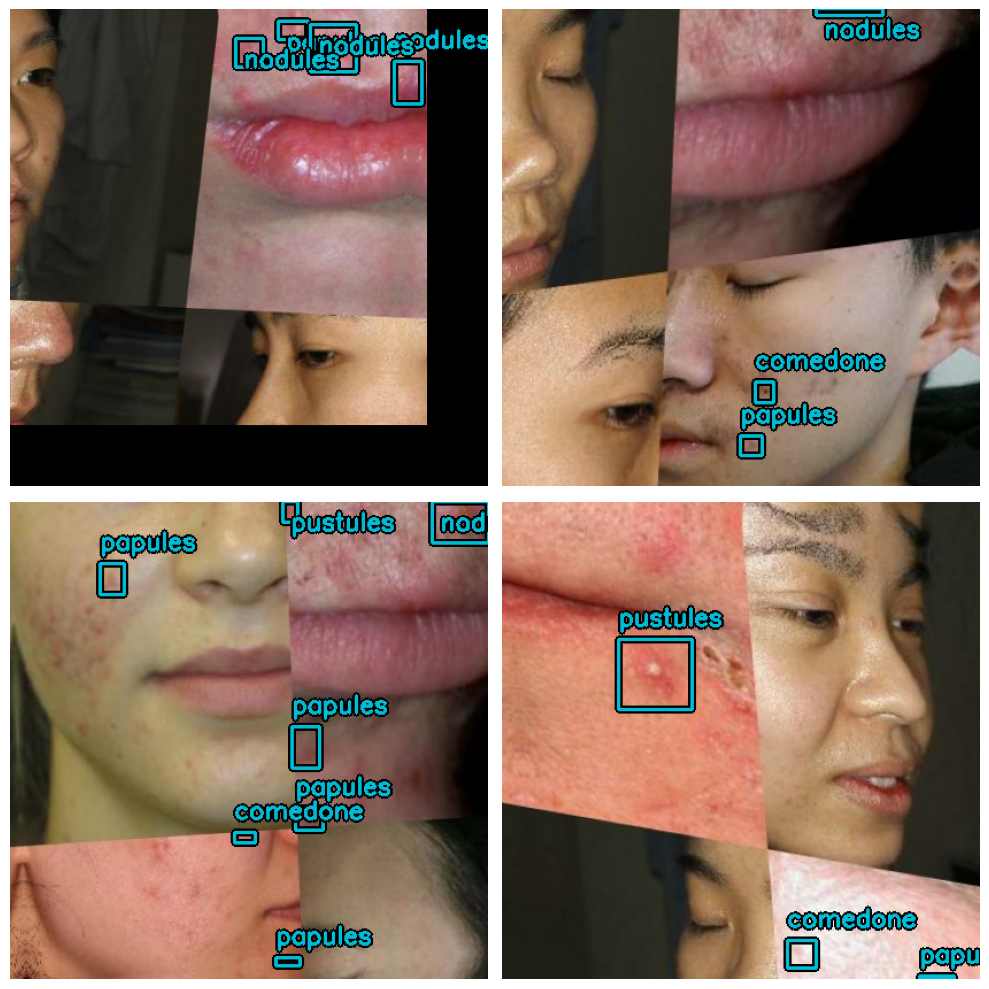

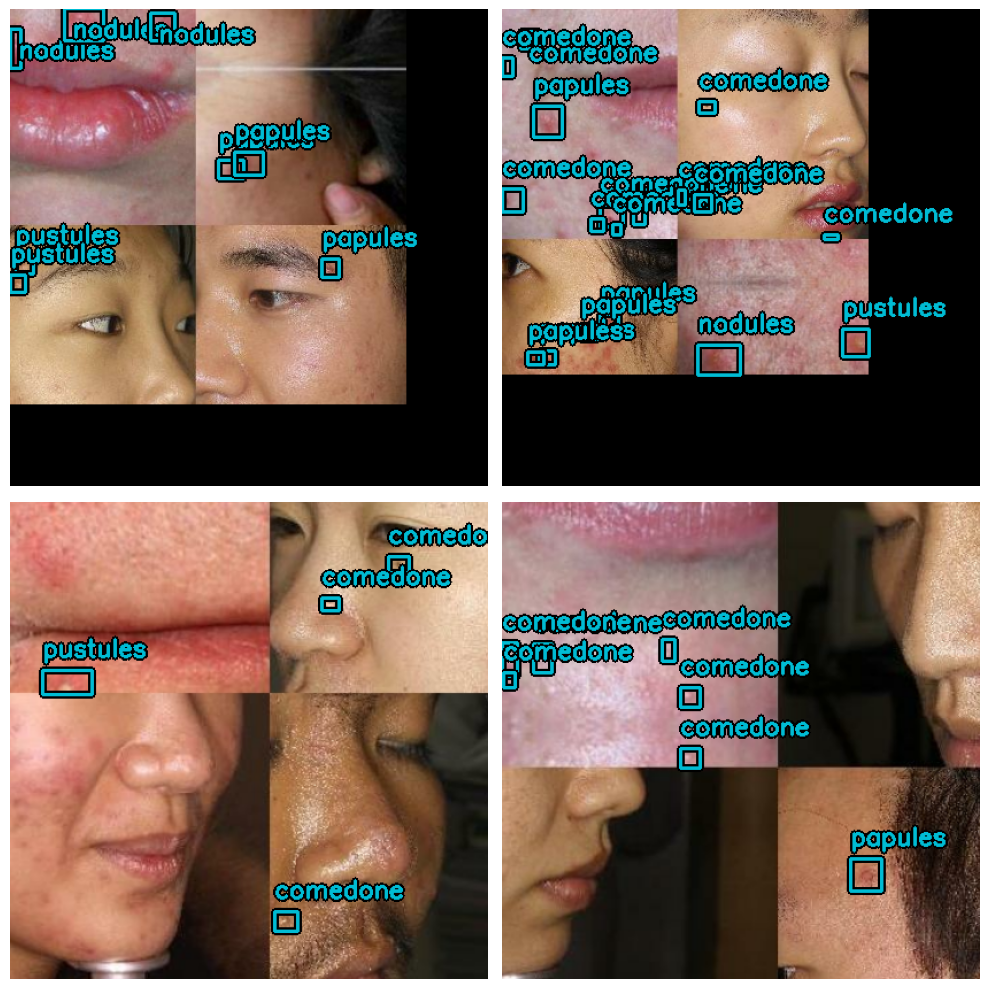

In [ ]:
def visualize_dataset(inputs, value_range, rows, cols, bounding_box_format):
    inputs = next(iter(inputs.take(1)))
    images, bounding_boxes = inputs["images"], inputs["bounding_boxes"]
    visualization.plot_bounding_box_gallery(
        images,
        value_range=value_range,
        rows=rows,
        cols=cols,
        y_true=bounding_boxes,
        scale=5,
        font_scale=0.7,
        bounding_box_format=bounding_box_format,
        class_mapping=class_mapping,
    )


visualize_dataset(
    train_ds, bounding_box_format="xyxy", value_range=(0, 255), rows=2, cols=2
)

visualize_dataset(
    val_ds, bounding_box_format="xyxy", value_range=(0, 255), rows=2, cols=2
)

In [ ]:
def dict_to_tuple(inputs):

    return inputs["images"], inputs["bounding_boxes"]

# Map dict_to_tuple function to train dataset and parallelize processing
train_ds = train_ds.map(dict_to_tuple, num_parallel_calls=tf.data.AUTOTUNE)
# Prefetch dataset elements to improve pipeline performance
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)

# Map dict_to_tuple function to validation dataset and parallelize processing
val_ds = val_ds.map(dict_to_tuple, num_parallel_calls=tf.data.AUTOTUNE)
# Prefetch dataset elements to improve pipeline performance
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)


In [ ]:
backbone = keras_cv.models.YOLOV8Backbone.from_preset(
    "yolo_v8_xl_backbone_coco"  # We will use yolov8 small backbone with coco weights
)

100%|██████████| 647/647 [00:00<00:00, 909kB/s]
100%|██████████| 119M/119M [00:08<00:00, 13.9MB/s]
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids
/usr/local/lib/python3.10/dist-packages/keras_cv/src/models/backbones/backbone.py:44: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  return id(getattr(self, attr)) not in self._functional_layer_ids


In [ ]:
# Define YOLOv8 detector model
yolo = keras_cv.models.YOLOV8Detector(
    num_classes=len(class_mapping),  # Number of classes in the dataset
    bounding_box_format="xyxy",  # Format of bounding boxes
    backbone=backbone,  # Backbone architecture for feature extraction
    fpn_depth=1,  # Depth of Feature Pyramid Network (FPN)
)


In [ ]:
# Define Adam optimizer with specified learning rate and global clipnorm
optimizer = tf.keras.optimizers.Adam(
    learning_rate=LEARNING_RATE,
    global_clipnorm=GLOBAL_CLIPNORM,
)

# Compile YOLO model with Adam optimizer and loss functions
yolo.compile(
    optimizer=optimizer,  # Optimizer for training
    classification_loss="binary_crossentropy",  # Classification loss function
    box_loss="ciou"  # Box regression loss function
)


In [ ]:
yolo.prediction_decoder = keras_cv.layers.NonMaxSuppression(
    bounding_box_format="xyxy",
    from_logits=True,
    iou_threshold=0.2,
    max_detections=100,
    confidence_threshold=0.505,
)

In [ ]:
yolo.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
)

Epoch 1/10
991/991 [==============================] - 579s 527ms/step - loss: 20.9902 - box_loss: 3.8717 - class_loss: 17.1185 - val_loss: 4.8921 - val_box_loss: 3.8202 - val_class_loss: 1.0719
Epoch 2/10
991/991 [==============================] - 532s 536ms/step - loss: 3.9415 - box_loss: 3.0699 - class_loss: 0.8716 - val_loss: 3.6898 - val_box_loss: 2.8701 - val_class_loss: 0.8197
Epoch 3/10
991/991 [==============================] - 531s 536ms/step - loss: 3.3684 - box_loss: 2.6325 - class_loss: 0.7358 - val_loss: 3.5634 - val_box_loss: 2.7338 - val_class_loss: 0.8296
Epoch 4/10
991/991 [==============================] - 532s 536ms/step - loss: 3.2228 - box_loss: 2.5201 - class_loss: 0.7026 - val_loss: 3.2488 - val_box_loss: 2.5815 - val_class_loss: 0.6672
Epoch 5/10
991/991 [==============================] - 532s 537ms/step - loss: 3.1308 - box_loss: 2.4610 - class_loss: 0.6698 - val_loss: 3.3838 - val_box_loss: 2.6612 - val_class_loss: 0.7225
Epoch 6/10
991/991 [==================

1/1 [==============================] - 0s 236ms/step


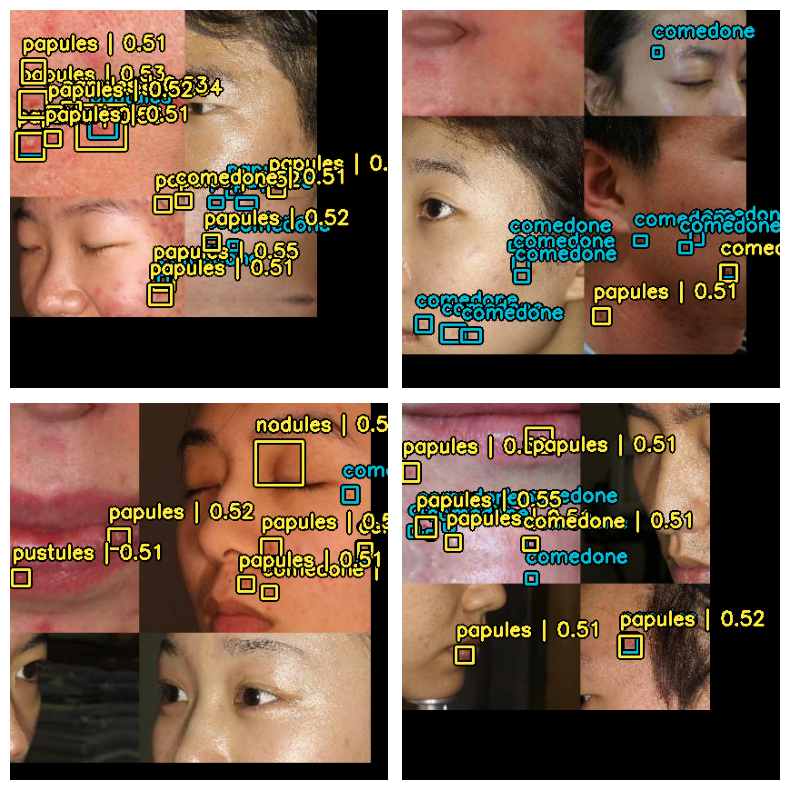

In [ ]:
def visualize_detections(model, dataset, bounding_box_format):

    # Get a batch of images and ground truth bounding boxes from the dataset
    images, y_true = next(iter(dataset.take(1)))
    # Predict bounding boxes using the model
    y_pred = model.predict(images)
    # Convert predicted bounding boxes to RaggedTensor format
    y_pred = bounding_box.to_ragged(y_pred)
    # Visualize bounding boxes on images
    visualization.plot_bounding_box_gallery(
        images,
        value_range=(0, 255),
        bounding_box_format=bounding_box_format,
        y_true=y_true,
        y_pred=y_pred,
        scale=4,
        rows=2,
        cols=2,
        show=True,
        font_scale=0.7,
        class_mapping=class_mapping,
    )

# Visualize detections using the YOLO model on the validation dataset
visualize_detections(yolo, dataset=val_ds, bounding_box_format="xyxy")


# Conclusions from the second experiment (Project Abstract - Part IV):

At this stage of the code, we can conclude that with the help of information and training materials, we were able to achieve the correct construction of a model with a multilabel problem. In the last picture you can see how well the trained model does. Blue squares indicate acne labels and yellow squares are the predictions of our model. Unfortunately, the number of pimples that our model recognizes is small, but in almost all predictions the model does it correctly and its answer corresponds to the label.

An indicator in the YOLO model is box loss, which averages 2.50, which is a good result. “box loss” is a value that shows the accuracy of finding the midpoint of an object, in our case the middle of a pimple. The “Class loss” indicator, which shows the accuracy of the classification of objects in the image, is 0.67. Despite these results, the loss for this model is 3.17. This is a satisfactory result for a multi-label classification model, but it is still an indication that the model cannot cope with the task as well as possible.

## Reference List:

Object Detection with KerasCV: https://keras.io/guides/keras_cv/object_detection_keras_cv/#model-creation

Efficient Object Detection with YOLOV8 and KerasCV: https://keras.io/examples/vision/yolov8/

Object Detection using KerasCV YOLOv8: https://learnopencv.com/object-detection-using-kerascv-yolov8/

Deep Learning in Medical Imaging: Multi-label Classification with PyTorch: https://www.youtube.com/watch?v=YsytDf-MDN4

Multilabel classification using Keras: https://www.youtube.com/watch?v=hraKTseOuJA&t=933s

Multiclass classification using Keras: https://www.youtube.com/watch?v=obOjpVdO3gY